# Telco Churn Prediction #

## Data Set Story

 Telco churn data includes information about an imaginary telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Shows which customers have left, stayed or signed up for their service

## Problem

It is expected to create a machine learning model that can predict customers who will leave the company.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

In [2]:
df=pd.read_csv(r"C:\Users\muhammedhanbaba\OneDrive - Ege Üniversitesi\Masaüstü\Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#I have to change TotalCharges to numeric variable
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [11]:
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

In [13]:
# Define numerical and categorical variables

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [ ]:
############
# ANALYSIS OF CATEGORICAL VARIABLES
############

In [15]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [16]:
for col in cat_cols:
    cat_summary(df, col)

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################
     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
##########################################
     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
##########################################
     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
##########################################
                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
##########################################
                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes 

In [17]:
############
# ANALYSIS OF NUMERICAL VARIABLES
############

In [18]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


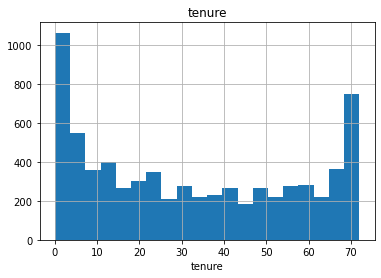

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


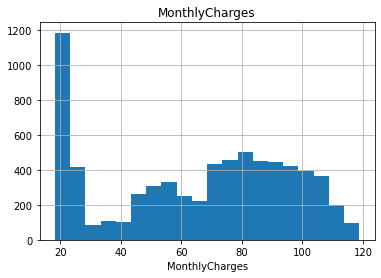

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


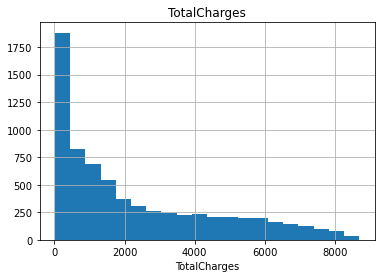

In [19]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [20]:
# When we focus on the tenure variable, it is observed that 1-month customers are too many, followed by 72-month customers.

In [21]:
df["tenure"].value_counts().head()

1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

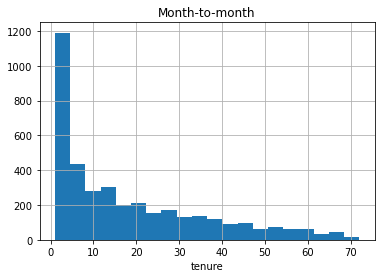

In [22]:
df[df["Contract"]== "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

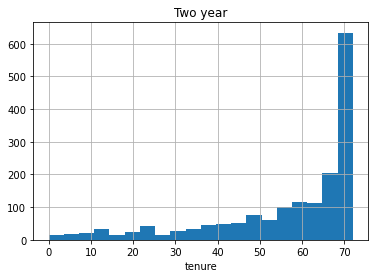

In [23]:
df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

In [ ]:
# When we focus on MonthyChargers, customers with month contracts may have more average monthly payments.

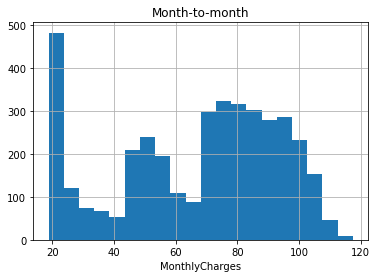

In [24]:
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Month-to-month")
plt.show()

In [25]:
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].mean()

66.39849032258037

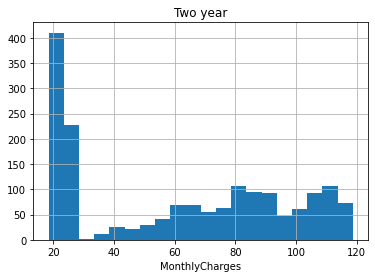

In [26]:
df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Two year")
plt.show()

In [27]:
df[df["Contract"] == "Two year"]["MonthlyCharges"].mean()

60.770412979351

In [28]:
############
# NUMERICAL VARIABLES - TARGET VARIABLE ANALYSIS
############

In [29]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")

In [30]:
for col in num_cols:
    target_summary_with_num(df,"Churn",col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




In [31]:
############
# CATEGORICAL VARIABLES - TARGET VARIABLE ANALYSIS
############

In [32]:
def target_summary_with_cat(dataframe, target, cat_col):
    print(cat_col)
    print(pd.DataFrame({"Target_Mean":dataframe.groupby(cat_col)[target].mean(),
                        "Count": dataframe[cat_col].value_counts(),
                        "Ratio":100* dataframe[cat_col].value_counts() / len(dataframe) 
                       }), end="\n\n\n")

In [33]:
for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

gender
        Target_Mean  Count     Ratio
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


Partner
     Target_Mean  Count     Ratio
No      0.329580   3641  51.69672
Yes     0.196649   3402  48.30328


Dependents
     Target_Mean  Count      Ratio
No      0.312791   4933  70.041176
Yes     0.154502   2110  29.958824


PhoneService
     Target_Mean  Count      Ratio
No      0.249267    682   9.683374
Yes     0.267096   6361  90.316626


MultipleLines
                  Target_Mean  Count      Ratio
No                   0.250442   3390  48.132898
No phone service     0.249267    682   9.683374
Yes                  0.286099   2971  42.183729


InternetService
             Target_Mean  Count      Ratio
DSL             0.189591   2421  34.374556
Fiber optic     0.418928   3096  43.958540
No              0.074050   1526  21.666903


OnlineSecurity
                     Target_Mean  Count      Ratio
No                      0.417667   3498  49.666335
No internet ser

In [34]:
##################################
# MISSING VALUE ANALYSIS
##################################

In [35]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [37]:
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11   0.16


In [38]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [39]:
df["TotalCharges"].isnull().any()

False

In [40]:
cat_cols=[col for col in cat_cols if col not in ["Churn"]]

In [41]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [42]:
dff = df.copy()

In [43]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [44]:
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [45]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [46]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [47]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [48]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [ ]:
##################################
# FEATURE EXTRACTION 
##################################

In [ ]:
# Create categorical variable from tenure variable

In [49]:
df.loc[(df["tenure"]>= 0) & (df["tenure"]<=12), "NEW_TENURE_YEAR"]= "0-1 YEAR"
df.loc[(df["tenure"]>= 12) & (df["tenure"]<=24), "NEW_TENURE_YEAR"]= "1-2 YEAR"
df.loc[(df["tenure"]>= 24) & (df["tenure"]<=36), "NEW_TENURE_YEAR"]= "2-3 YEAR"
df.loc[(df["tenure"]>= 36) & (df["tenure"]<=48), "NEW_TENURE_YEAR"]= "3-4 YEAR"
df.loc[(df["tenure"]>= 48) & (df["tenure"]<=60), "NEW_TENURE_YEAR"]= "4-5 YEAR"
df.loc[(df["tenure"]>= 60) & (df["tenure"]<=72), "NEW_TENURE_YEAR"]= "5-6 YEAR"

In [ ]:
#Specifying customers with a contract of 1-2 years as "Engaged"

In [50]:
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year", "Two year"] else 0)

In [53]:
# People who don't receive any tech support, online backup or device protection.

In [54]:
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [55]:
#Customers with monthly contracts who are young

In [56]:
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [57]:
#Total number of services received by the customer

In [58]:
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                               'OnlineBackup', 'DeviceProtection', 'TechSupport',
                               'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [59]:
#People who buy any streaming service

In [60]:
df["NEW_FLAG_ANY_STREAMING"]=df.apply ( lambda x:1 if (x["StreamingTV"]== "Yes")or (x["StreamingMovies"]=="Yes") else 0, axis=1)

In [61]:
#Does the customer make automatic payments?

In [63]:
df["PaymentMethod"].unique()
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)

In [64]:
#Average monthly payment

In [65]:
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] +0.1)

In [ ]:
# Current Price increase relative to average price

In [66]:
df["NEW_Increase"] = df["NEW_AVG_Charges"] / (df["MonthlyCharges"] + 1)

In [ ]:
# Charge per service

In [67]:
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [68]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0-1 YEAR,0,1,1,1,0,0,27.136364,0.879623,14.9250
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,2-3 YEAR,1,1,0,3,0,0,55.410557,0.956179,14.2375
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0-1 YEAR,0,1,1,3,0,0,51.500000,0.938924,13.4625
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,3-4 YEAR,1,1,0,3,0,1,40.814856,0.942606,10.5750
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0-1 YEAR,0,1,1,1,0,0,72.214286,1.007173,35.3500


In [69]:
df.shape

(7043, 31)

In [70]:
##################################
# ENCODING
##################################

In [71]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


In [ ]:
# LABEL ENCODING

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [80]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [81]:
for col in binary_cols:
    df = label_encoder(df, col)

In [82]:
# One-Hot Encoding

In [83]:
#Update process of cat_cols list

In [84]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'NEW_TENURE_YEAR',
 'SeniorCitizen',
 'NEW_Engaged',
 'NEW_noProt',
 'NEW_Young_Not_Engaged',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AutoPayment']

In [85]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [86]:
df = one_hot_encoder(df, cat_cols, drop_first=True)


In [87]:
df.shape

(7043, 46)

In [ ]:
##################################
# MODELLING
##################################

In [88]:
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

In [89]:
cart_model= DecisionTreeClassifier(random_state=17).fit(X,y)

In [98]:
cv= cross_validate(cart_model, X, y, cv=5 , scoring= ["accuracy", "f1", "roc_auc"])

In [100]:
cv['test_accuracy'].mean()

0.7337763726692045

In [101]:
cv['test_f1'].mean()

0.5006775208580111

In [102]:
cv['test_roc_auc'].mean()

0.6607226738681702

In [103]:
################################################
# Hyperparameter Optimization with GridSearchCV
################################################

In [104]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [105]:
cart_params= {"max_depth": range(1,11),
             'min_samples_split': range(2,20)}

In [106]:
cart_best_grid= GridSearchCV(cart_model, cart_params, cv=5,
                            n_jobs=-1,
                            verbose=1). fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [107]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [108]:
cart_best_grid.best_score_

0.7871640912316924

In [109]:
################################################
# Final Model
################################################

In [118]:
cart_final= DecisionTreeClassifier(**cart_best_grid.best_params_,
                                  random_state=17).fit(X,y)

In [119]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [120]:
cart_final= cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [122]:
cv = cross_validate(cart_final, X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [126]:
cv['test_accuracy'].mean()

0.7871640912316924

In [127]:
cv['test_f1'].mean()

0.5644983672152739

In [128]:
cv['test_roc_auc'].mean()

0.8246449859525828

In [135]:
################################################
# Feature Importance
################################################

In [148]:
cart_final.feature_importances_

array([0.        , 0.        , 0.        , 0.10812967, 0.01015232,
       0.        , 0.01155735, 0.05577379, 0.        , 0.0661672 ,
       0.00219545, 0.18728459, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00904261, 0.        , 0.01004554,
       0.        , 0.02173869, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.5179128 ,
       0.        , 0.        , 0.        , 0.        ])

In [130]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

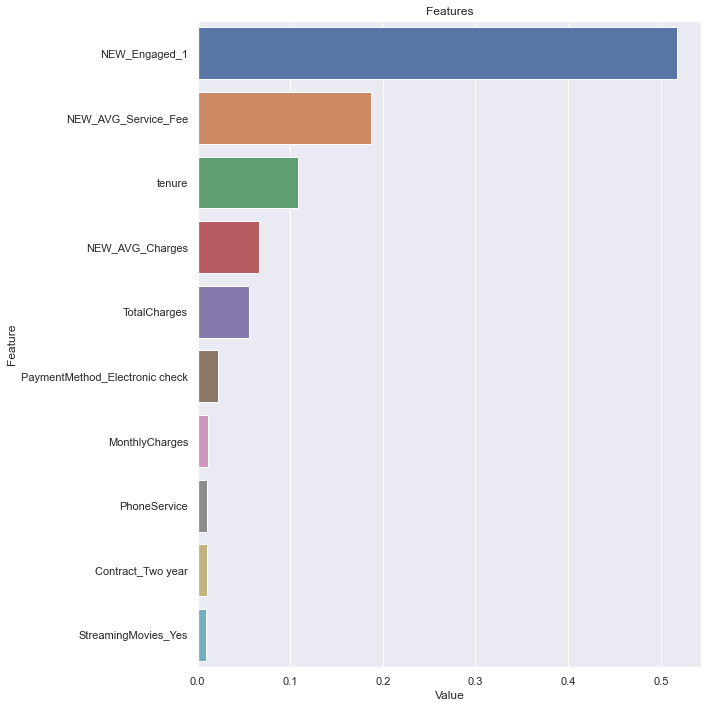

In [134]:
plot_importance(cart_final, X, num=10)

In [146]:
################################################
# Extracting Decision Rules
################################################

In [147]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules)

|--- NEW_Engaged_1 <= 0.50
|   |--- NEW_AVG_Service_Fee <= 17.12
|   |   |--- tenure <= 5.50
|   |   |   |--- NEW_AVG_Charges <= 33.37
|   |   |   |   |--- TotalCharges <= 33.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  33.40
|   |   |   |   |   |--- class: 0
|   |   |   |--- NEW_AVG_Charges >  33.37
|   |   |   |   |--- NEW_AVG_Charges <= 44.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- NEW_AVG_Charges >  44.03
|   |   |   |   |   |--- class: 0
|   |   |--- tenure >  5.50
|   |   |   |--- MonthlyCharges <= 97.53
|   |   |   |   |--- PhoneService <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PhoneService >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- MonthlyCharges >  97.53
|   |   |   |   |--- TotalCharges <= 1626.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- TotalCharges >  1626.08
|   |   |   |   |   |--- class: 0
|   |--- NEW_AVG_Service_Fee >  17.12
|   |   |--- tenure <= 14.50
|   |   |   |--- NEW_A